In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx', sheet_name='dataframe')
df.sort_values('2019Q2_aktywa',ascending=False).head()

,Nazwa,2019Q2_aktywa,2019Q1_aktywa,2018Q2_aktywa,2019Q2_mobile,2019Q1_mobile,2018Q2_mobile,2019Q2_internet,2019Q1_internet,2018Q2_internet,...,2018Q2_placowki,2019Q2_partner,2019Q1_partner,2018Q2_partner,2019Q2_etat,2019Q1_etat,2018Q2_etat,2019Q2_etat_grupa,2019Q1_etat_grupa,2018Q2_etat_grupa
12,PKO BP,301339000,298403000,276088000,2136646,2012570,1534243,8680400,10935000,10262200,...,1176,535,557,600,24100,24200,24700,28100,27900,28500
2,Bank Pekao,189574297,189494130,178781524,889475,778537,623599,3340969,3330006,3171625,...,851,-1,-1,-1,14436,14591,15182,16613,16815,17307
14,Santander Bank Polska,181300141,185555589,147610558,1111843,1048828,814928,3904082,3825991,3259127,...,540,124,124,113,11113,11695,11174,14058,14642,14286
10,ING Bank Śląski,147057000,142042800,127108000,1372000,1288000,1014585,3975000,3894000,3605069,...,352,-1,-1,-1,7693,7644,7630,8119,8063,8026
11,mBank,143942202,142564251,132012206,1673786,1571093,1296379,3928090,3914732,3676510,...,140,41,41,41,5993,5919,5682,6677,6576,6358


In [3]:
def apply_scalers(df,columns_to_exclude=None):
    if columns_to_exclude:
        exclude_filter = ~df.columns.isin(columns_to_exclude)
    else:
        exclude_filter = ~df.columns.isin([])
    for column in df.iloc[:,exclude_filter].columns:
        df[column] = df[column].astype(float)
    df.loc[:,exclude_filter] = StandardScaler().fit_transform(df.loc[:,exclude_filter])

    return df

In [4]:
df = apply_scalers(df,columns_to_exclude=['Nazwa'])
df.sort_values('2019Q2_aktywa',ascending=False).head()


,Nazwa,2019Q2_aktywa,2019Q1_aktywa,2018Q2_aktywa,2019Q2_mobile,2019Q1_mobile,2018Q2_mobile,2019Q2_internet,2019Q1_internet,2018Q2_internet,...,2018Q2_placowki,2019Q2_partner,2019Q1_partner,2018Q2_partner,2019Q2_etat,2019Q1_etat,2018Q2_etat,2019Q2_etat_grupa,2019Q1_etat_grupa,2018Q2_etat_grupa
12,PKO BP,2.439176,2.451434,2.549791,2.272044,2.289286,2.208174,2.870860,3.180157,3.212267,...,2.699725,0.087071,0.104621,0.147944,2.867369,2.842515,2.940044,2.707886,2.691490,2.777432
2,Bank Pekao,1.170632,1.173505,1.287303,0.430077,0.354995,0.389769,0.495076,0.363630,0.395437,...,1.632315,-0.387541,-0.389552,-0.382783,1.243987,1.244292,1.360658,1.237344,1.274860,1.356310
14,Santander Bank Polska,1.076719,1.127290,0.882881,0.758496,0.778664,0.771821,0.745633,0.547319,0.430198,...,0.610887,-0.276857,-0.278850,-0.282112,0.685782,0.762614,0.695584,0.910259,0.997157,0.972748
10,ING Bank Śląski,0.688055,0.616714,0.616873,1.142726,1.153556,1.170503,0.777188,0.572506,0.567629,...,-0.006569,-0.387541,-0.389552,-0.382783,0.111283,0.088829,0.107505,0.149960,0.156381,0.177946
11,mBank,0.652702,0.622833,0.680502,1.588438,1.597291,1.733199,0.756316,0.580184,0.596010,...,-0.702848,-0.350351,-0.352356,-0.345694,-0.174287,-0.198083,-0.215740,-0.034642,-0.033653,-0.033832


In [5]:
exclude_filter = ~df.columns.isin(['Nazwa'])

In [18]:
fa = FactorAnalyzer(n_factors=3,rotation=None)
fa.fit(df.loc[:,exclude_filter])
fa_loadings = fa.loadings_

C:\Users\micha\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
print("Ładunki czynnikowe (Factor Loadings): \n", fa_loadings)

Ładunki czynnikowe (Factor Loadings): 
 [[ 8.86313619e-01  9.58241995e-02  1.41806007e-01]
 [ 8.88644508e-01  6.41299759e-02  1.53858207e-01]
 [ 9.17964022e-01  5.64539104e-02  8.00554957e-02]
 [ 7.87154344e-01  4.28619295e-01 -1.83108800e-01]
 [ 7.82925936e-01  4.41208089e-01 -2.05423279e-01]
 [ 7.61739707e-01  4.58341604e-01 -1.94483108e-01]
 [ 9.63802755e-01  1.61305611e-01 -1.50208309e-01]
 [ 1.02354770e+00  5.80737269e-02 -2.32563749e-01]
 [ 1.03256202e+00  4.27124448e-02 -2.50167964e-01]
 [-1.89241244e-01  1.03528749e+00 -9.18446603e-03]
 [-1.91213631e-01  1.02480526e+00  1.91689407e-02]
 [-1.96937292e-01  1.02820016e+00  3.12442615e-02]
 [ 8.71006541e-01  1.92774556e-01 -6.05003453e-02]
 [ 8.77857661e-01  1.82196885e-01 -4.99244419e-02]
 [ 8.96262238e-01  1.66997587e-01 -6.61729655e-02]
 [ 9.81211775e-01  7.18178011e-02 -6.95851854e-02]
 [ 9.82846065e-01  6.54411747e-02 -6.85145659e-02]
 [ 9.90476459e-01  6.48592684e-02 -1.29189661e-01]
 [ 6.97992291e-02  4.15517458e-01  5.84355

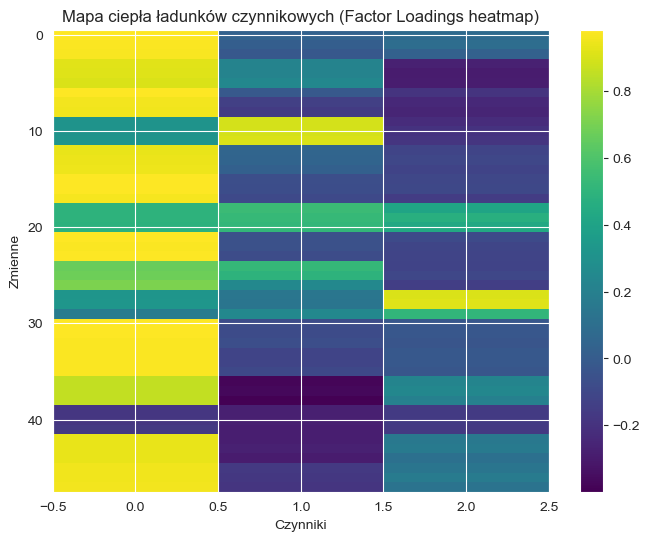

In [19]:
plt.figure(figsize = (8,6))
plt.title('Mapa ciepła ładunków czynnikowych (Factor Loadings heatmap)')
plt.imshow(fa_loadings,cmap='viridis',aspect='auto')
plt.colorbar()
plt.xlabel('Czynniki')
plt.ylabel('Zmienne')
plt.show()

In [21]:
factors = fa.transform(df.loc[:,exclude_filter])
factors

C:\Users\micha\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([[ 0.1015625 ,  0.875     ,  1.40625   ],
       [-0.1328125 ,  0.625     , -0.4375    ],
       [ 0.93652344, -0.53125   ,  2.4375    ],
       [-0.90625   , -0.875     , -0.25      ],
       [-0.0234375 , -0.1875    ,  1.625     ],
       [-1.3671875 , -0.421875  ,  1.0234375 ],
       [-0.875     , -1.65625   , -3.546875  ],
       [-0.75585938, -0.49023438,  0.03125   ],
       [-0.6171875 , -1.046875  , -1.78125   ],
       [-0.4375    ,  0.87316895,  1.6875    ],
       [ 0.7243042 ,  1.59375   , -1.5       ],
       [ 0.69335938,  2.1875    , -0.3125    ],
       [ 2.625     , -2.3125    , -2.        ],
       [-0.9140625 ,  0.3125    ,  0.53125   ],
       [ 1.03125   ,  1.25      ,  1.25      ]])

# Dobór ilości czynników

In [22]:
eig_values, eig_vectors = np.linalg.eig(df.iloc[:,exclude_filter].cov())

In [23]:
total_variance = df.iloc[:,exclude_filter].var().sum()
print(total_variance)

51.42857142857143


In [24]:
eig_values_sum = eig_values.sum()
print(eig_values_sum)

(51.42857142857143+0j)


In [32]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=10)

var_exp = eig_values/total_variance
print("Proporcja warinacji wyjaśniona przez każdą składową/czynnik",var_exp)

Proporcja warinacji wyjaśniona przez każdą składową/czynnik [ 0.6804304119+0.j  0.1126574212+0.j  0.0776779192+0.j  0.0571765649+0.j
  0.0399008237+0.j  0.0097279431+0.j  0.0074850854+0.j  0.0070554476+0.j
  0.0046739054+0.j  0.001800321 +0.j  0.0010999587+0.j  0.0001717939+0.j
  0.0000900976+0.j  0.0000523064+0.j  0.          +0.j -0.          +0.j
 -0.          +0.j -0.          -0.j  0.          +0.j  0.          +0.j
  0.          -0.j  0.          +0.j  0.          -0.j -0.          +0.j
  0.          +0.j  0.          +0.j  0.          -0.j  0.          +0.j
  0.          -0.j -0.          +0.j -0.          +0.j -0.          -0.j
 -0.          +0.j  0.          +0.j  0.          -0.j -0.          +0.j
 -0.          +0.j -0.          +0.j -0.          -0.j  0.          +0.j
  0.          -0.j  0.          +0.j -0.          +0.j -0.          +0.j
 -0.          +0.j -0.          +0.j -0.          +0.j -0.          +0.j]


C:\Users\micha\miniconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\micha\miniconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


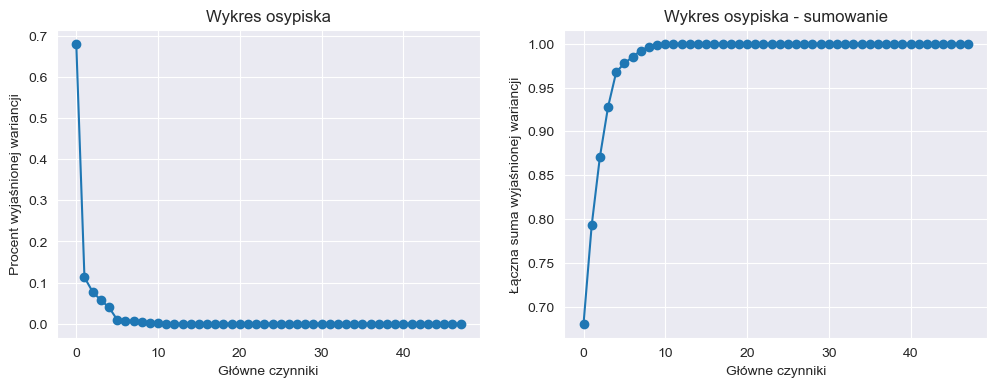

In [33]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(var_exp,marker="o")
ax[0].set_title('Wykres osypiska')
ax[0].set_xlabel('Główne czynniki')
ax[0].set_ylabel('Procent wyjaśnionej wariancji')

ax[1].plot(np.cumsum(var_exp),marker="o")
ax[1].set_title('Wykres osypiska - sumowanie')
ax[1].set_xlabel('Główne czynniki')
ax[1].set_ylabel('Łączna suma wyjaśnionej wariancji')

plt.show()

# Kryterium wyjasnionej wariancji

In [34]:
print(np.cumsum(var_exp))

[0.6804304119+0.j 0.7930878331+0.j 0.8707657523+0.j 0.9279423172+0.j
 0.9678431409+0.j 0.977571084 +0.j 0.9850561694+0.j 0.992111617 +0.j
 0.9967855224+0.j 0.9985858434+0.j 0.9996858021+0.j 0.999857596 +0.j
 0.9999476936+0.j 1.          +0.j 1.          +0.j 1.          +0.j
 1.          +0.j 1.          +0.j 1.          +0.j 1.          +0.j
 1.          +0.j 1.          +0.j 1.          +0.j 1.          +0.j
 1.          +0.j 1.          +0.j 1.          +0.j 1.          +0.j
 1.          +0.j 1.          +0.j 1.          +0.j 1.          +0.j
 1.          +0.j 1.          +0.j 1.          +0.j 1.          +0.j
 1.          +0.j 1.          +0.j 1.          +0.j 1.          +0.j
 1.          +0.j 1.          +0.j 1.          +0.j 1.          +0.j
 1.          +0.j 1.          +0.j 1.          +0.j 1.          +0.j]


# Reguła Kaisera

In [37]:
kaiser_rule = np.where(eig_values > 1)[0]
print(kaiser_rule)

[0 1 2 3 4]
